# Heart Disease Classification with DecisionTree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

[UCI Heart-Disease Data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Targets:
- 0: Has Disease
- 1: No Disease

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Train-test Split

Before we proceed further, we split the data.

Split into `X_train`, `X_test`, `y_train`, `y_test`.

Use: `test_size=0.2`, `random_state=1`

In [3]:
X = df.drop(columns='target')
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
xdf =pd.DataFrame({'Country':['Nepal','India','China']})

In [6]:
pd.get_dummies(xdf)

,Country_China,Country_India,Country_Nepal
0,0,0,1
1,0,1,0
2,1,0,0


## One-Hot Encoding

We need to One-Hot-Encoded the Categorical Columns. **Q. Why?**

Use `OneHotEncoder` to encode the categorical columns then concat (horizontally; `axis=1`) to get final DataFrame.

Repeat for Test set.

At the end we should have `X_train_encoded` and `X_test_encoded`.

In [7]:
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train.columns if c not in cat_columns]

In [8]:
print(num_columns)
cat_columns

['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca']


['cp', 'exang', 'slope', 'thal']

In [9]:
# for col in cat_columns:
#     print(col, X_train[col].unique())

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder=OneHotEncoder(handle_unknown='ignore')

# Fit on categorical columns
# cp -> {1,0,2,3}
# cp_0
# cp_1
# cp_2
# cp_3
encoder.fit(X_train[cat_columns])

#Column Names
column_names=encoder.get_feature_names(input_features = cat_columns)


#Transform on training data
#Transform gareko ma kati ko ota column haru 
X_train_cat_encoded = encoder.transform(X_train[cat_columns])
# print(type(X_train_cat_encoded).todense().shape)

# todense le sparse matrix lai numpy matrix ma lagcha


X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.todense(), 
                                      columns=column_names,
                                      index=X_train.index)
X_train_cat_encoded_df.head()
# print(column_names)

,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
62,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
127,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
287,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
num_columns + list(column_names)

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [13]:
X_train[num_columns].shape

(242, 9)

In [14]:
X_train_encoded = pd.concat([X_train[num_columns], X_train_cat_encoded_df],axis=1)
X_train_encoded.shape

(242, 22)

In [15]:
#Transform on test data
#Transform gareko ma kati ko ota column haru 
X_test_cat_encoded = encoder.transform(X_test[cat_columns])
# print(type(X_train_cat_encoded).todense().shape)

# todense le sparse matrix lai numpy matrix ma lagcha


X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.todense(), 
                                      columns=column_names,
                                      index=X_test.index)
X_test_cat_encoded_df.head()
X_test_encoded = pd.concat([X_test[num_columns], X_test_cat_encoded_df],axis=1)
X_test_encoded.shape
# print(column_names)

(61, 22)

## Decision Tree Classifier (Out-of-the-box)

Compute `classification_report` for `DecisionTreeClassifier` out-of-the-box.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [17]:
classifier=DecisionTreeClassifier(random_state=1)

#Train Decision Tree Classifier
classify=classifier.fit(X_train_encoded,y_train)

predictions=classifier.predict(X_test_encoded)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.74      0.74      0.74        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Effect of max_depth

Just to get a sense of `max_depth` on over/under-fitting, compute train and test accuracy for different values of `max_depth`.

**Q. What will be the effect on training and test accuracy as we increase `max_depth`?**

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
#Change in accuracy 

for max_depth in (1, 3, 5, 7, 9):
    dtree_model = DecisionTreeClassifier(random_state=1, max_depth=max_depth)
    dtree_model.fit(X_train_encoded,y_train)
    train_preds = dtree_model.predict(X_train_encoded)
    test_preds = dtree_model.predict(X_test_encoded)
    

    print('Max Depth: ', max_depth)
    print('Training Accuracy:\t {0:.3f}'.format(accuracy_score(y_train, train_preds)))
    print('Test Accuracy:\t\t {0:.3f}\n'.format(accuracy_score(y_test, test_preds)))

Max Depth:  1
Training Accuracy:	 0.781
Test Accuracy:		 0.672

Max Depth:  3
Training Accuracy:	 0.864
Test Accuracy:		 0.721

Max Depth:  5
Training Accuracy:	 0.946
Test Accuracy:		 0.689

Max Depth:  7
Training Accuracy:	 0.988
Test Accuracy:		 0.689

Max Depth:  9
Training Accuracy:	 1.000
Test Accuracy:		 0.738



## Grid Search

Perform `GridSearchCV` with `random_state=1` for the classifier and `scoring=accuracy`.

Here we are looking at two attributes.

In [106]:
grid_params = {
    'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8, 10),
    'min_samples_leaf' : (1, 2, 3, 4)
}

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

clf=GridSearchCV(DecisionTreeClassifier(),grid_params)
clf.fit(X_train_encoded,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (3, 5, 7, 9, 11, 13),
               

## Best Model

Compute accuracy for the best model determined from the GridSearch.

In [111]:
#Best Model
print(clf.best_score_,clf.best_params_)

0.8393707482993197 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [112]:
dtree_best_model = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=8,min_samples_leaf=1)
dtree_best_model.fit(X_train_encoded,y_train)
train_preds = dtree_best_model.predict(X_train_encoded)
test_preds = dtree_best_model.predict(X_test_encoded)

print('Training Accuracy:\t {0:.3f}'.format(accuracy_score(y_train, train_preds)))
print('Test Accuracy:\t\t {0:.3f}\n'.format(accuracy_score(y_test, test_preds)))

Training Accuracy:	 0.926
Test Accuracy:		 0.721



## Visualizing the tree

Source: https://stackoverflow.com/a/55532629

In [113]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtree_best_model, out_file='tree.dot', 
                feature_names = X_train_encoded.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Feature Importance

**Q. What feature is the model most relying on?**

Use the `feature_importances_` attribute of the model. 

Where are the feature names? 

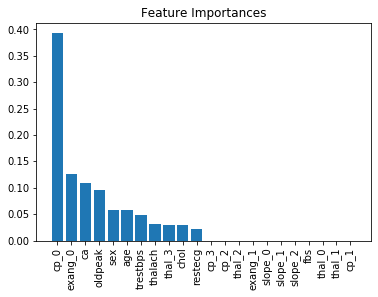

{'age': 0.05770946490634813, 'sex': 0.05834389880372106, 'trestbps': 0.0482498675042071, 'chol': 0.028552916457066077, 'fbs': 0.0, 'restecg': 0.021597216714473854, 'thalach': 0.03163787998676826, 'oldpeak': 0.09654412164909472, 'ca': 0.10930637674345994, 'cp_0': 0.3924174454772936, 'cp_1': 0.0, 'cp_2': 0.0, 'cp_3': 0.0, 'exang_0': 0.1270029023941747, 'exang_1': 0.0, 'slope_0': 0.0, 'slope_1': 0.0, 'slope_2': 0.0, 'thal_0': 0.0, 'thal_1': 0.0, 'thal_2': 0.0, 'thal_3': 0.028637909363392344}


In [114]:
importances = dtree_best_model.feature_importances_
indices = np.argsort(importances)[::-1]   #gives the index of highest importances in descending order

columns=num_columns + list(column_names)
names=[columns[i] for i in indices]


plt.title('Feature Importances')
plt.bar(range(X_train_encoded.shape[1]),importances[indices])
plt.xticks(range(X_train_encoded.shape[1]),names,rotation=90)
plt.show()

print(dict(zip(columns,importances)))

# for i in range(X_train_encoded.shape[1]):
#     print(columns[i],'\t',importances[i])

## Closing Questions

- We consider DecisionTrees to be `low bias, high variance` models. Why?
- Would we expect `DecisionTree` to work well on NLP classification tasks (E.g: The sentiment classification)? Why or why not?
- What are the effects we'd expect in changing the different parameters we have for DecisionTree? E.g: `min_samples_leaf`, `criterion`

min_samples_split specifies the minimum number of samples required to split an internal node, while 

min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. 
But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. 

If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node.

## Practical Notes

- In practice, we generally don't use single decision trees (as done here). We lean towards ensembles (e.g: RandomForest) and boosting methods (e.g: XGBoost). 
- In general, it's worth knowing (roughly) what each hyper-parameter does in a model.
- Decision Trees are usually taken to be "interpretable". But when it's even a bit deep, it's hard to make sense of it. 
- Related: Having the feature_importances is nice. But also worth not reading too much off it. Better to lean towards methods like [shap](https://github.com/slundberg/shap), which is a more rigorous approach.

In [115]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python

## Bagging Classifier

In [324]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection

clf=DecisionTreeClassifier(random_state=1)

kfold = model_selection.KFold(n_splits=9, random_state=1)
bag_model=BaggingClassifier(base_estimator = dtree_best_model, 
                        n_estimators = 10,
                       random_state = 1)

#Predictions of every base classifier
results = model_selection.cross_val_score(bag_model,X_train_encoded, y_train, cv= kfold)

print("Accuracy: ", results.mean())
# model.fit(X_train_encoded,y_train)
# train_preds = model.predict(X_train_encoded)
# test_preds = model.predict(X_test_encoded)

# print('Training Accuracy:\t {0:.3f}'.format(accuracy_score(y_train, train_preds)))
# print('Test Accuracy:\t\t {0:.3f}\n'.format(accuracy_score(y_test, test_preds)))

Accuracy:  0.8182969294080404


In [325]:
from sklearn.model_selection import GridSearchCV

grid_params={
    'n_estimators' : (10,50,100),
    'max_features': (.6,.7,.8,.9,1.0),
    'max_samples' : (.6,.7,.8,.9,1.0)
            }

In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement.

In [326]:
buggy = GridSearchCV(BaggingClassifier(),grid_params)
buggy.fit(X_train_encoded, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': (0.6, 0.7, 0.8, 0.9, 1.0),
                         'max_samples': (0.6, 0.7, 0.8, 0.9, 1.0),
                         'n_estimators': (10, 50, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [327]:
print(buggy.best_score_,'\n',buggy.best_params_)

0.8722789115646259 
 {'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 100}


In [328]:
bag_model=BaggingClassifier(n_estimators=100, max_features= 1.0, max_samples= 0.6, random_state=1)

results = model_selection.cross_val_score(bag_model, X_train_encoded, y_train, cv=kfold)
print(results.mean())

0.8553339664450774


## Gradient  Tree Boosting

The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; 

The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf nodes via max_leaf_nodes. 

The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .

Note: For SVM:

Classification with more than 2 classes requires the induction of n_classes regression trees at each iteration, thus, the total number of induced trees equals n_classes * n_estimators. For datasets with a large number of classes we strongly recommend to use HistGradientBoostingClassifier as an alternative to GradientBoostingClassifier.

In [205]:
gboost= GradientBoostingClassifier(n_estimators=10, 
                                   learning_rate=1.0,
                                   max_depth=3, 
                                   random_state=1)
gboost.fit(X_train_encoded,y_train)
gboost.score(X_test_encoded,y_test)

0.7049180327868853

In [206]:
#Hyper parameter Tuning

grid_params={
    'n_estimators' : (10,50,100),
    'learning_rate': (.6,.7,.8,.9,1.0),
    'max_depth' : (3, 5, 7, 9),
#     'min_samples_split': (1,10,50,100)
            }

In [207]:
import warnings
warnings.filterwarnings('ignore')

gboost = GridSearchCV(GradientBoostingClassifier(),grid_params)
gboost.fit(X_train_encoded, y_train)

print(gboost.best_score_,'\n',gboost.best_params_)


0.8558673469387756 
 {'learning_rate': 0.7, 'max_depth': 5, 'n_estimators': 50}


In [257]:
gboost_best= GradientBoostingClassifier(n_estimators=50, 
                                        learning_rate=0.6,
                                        max_depth=5, 
                                        random_state=1)
gboost_best.fit(X_train_encoded,y_train)

print('Training: ', gboost_best.score(X_train_encoded,y_train))

print('Test :', gboost_best.score(X_test_encoded,y_test))

kfold = model_selection.KFold(n_splits=7, random_state=1)

results = model_selection.cross_val_score(gboost_best,X_train_encoded, y_train, cv= kfold)

print("Accuracy: ", results.mean())


Training:  1.0
Test : 0.7377049180327869
Accuracy:  0.831452581032413


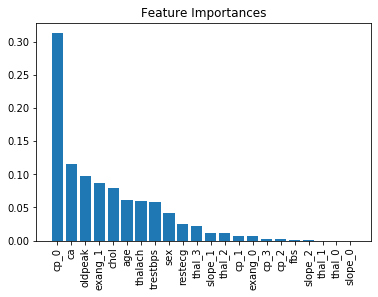

{'age': 0.06139272676556181, 'sex': 0.04116810211991483, 'trestbps': 0.05896549173157379, 'chol': 0.07890651999177302, 'fbs': 0.00032257268678840943, 'restecg': 0.024633329436916318, 'thalach': 0.05939615285966417, 'oldpeak': 0.09781536769212716, 'ca': 0.1152471104299479, 'cp_0': 0.31317409558694465, 'cp_1': 0.007206683613699938, 'cp_2': 0.0022620464869105715, 'cp_3': 0.002404060374282283, 'exang_0': 0.006378966413883483, 'exang_1': 0.08661293316888044, 'slope_0': 2.1698858734425083e-06, 'slope_1': 0.011071812074669599, 'slope_2': 0.0002850625005462134, 'thal_0': 3.294667811293239e-06, 'thal_1': 5.136198767442618e-05, 'thal_2': 0.010886234699455072, 'thal_3': 0.021813904825101402}


In [258]:
importances=gboost.feature_importances_
indices = np.argsort(importances)[::-1]   #gives the index of highest importances in descending order

columns=num_columns + list(column_names)
names=[columns[i] for i in indices]

plt.title('Feature Importances')
plt.bar(range(X_train_encoded.shape[1]),importances[indices])
plt.xticks(range(X_train_encoded.shape[1]),names,rotation=90)
plt.show()

print(dict(zip(columns,importances)))

## AdaBoostClassifier

The number of weak learners is controlled by the parameter n_estimators. 
The learning_rate parameter controls the contribution of the weak learners in the final combination. 
By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. 

The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).

In [217]:
adaboost=AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=1)
adaboost.fit(X_train_encoded,y_train)

adaboost.score(X_train_encoded, y_train)

0.9504132231404959

In [308]:
#Hyper parameter Tuning

grid_param={
    'n_estimators' : (10,50,100),
    'learning_rate': (.6,.7,.8,.9,1.0),
#     'max_depth' : (3, 5, 7, 9),
#     'min_samples_split': (1,10,50,100)
            }

In [309]:
import warnings
warnings.filterwarnings('ignore')

adaboost = GridSearchCV(AdaBoostClassifier(),grid_param)
adaboost.fit(X_train_encoded, y_train)

print(adaboost.best_score_,'\n',adaboost.best_params_)


0.8556122448979592 
 {'learning_rate': 0.8, 'n_estimators': 10}


In [318]:
adaboost_best=AdaBoostClassifier(n_estimators=50,
                                 learning_rate=1, 
                                 random_state=1)
adaboost_best.fit(X_train_encoded,y_train)

print('On Training: ',adaboost_best.score(X_train_encoded, y_train))
print('On Testing: ',adaboost_best.score(X_test_encoded, y_test))

kf = model_selection.KFold(n_splits=7, random_state=1)

result = model_selection.cross_val_score(adaboost_best,X_train_encoded, y_train, cv= kf)

print("Accuracy: ", result.mean())


On Training:  0.9504132231404959
On Testing:  0.7377049180327869
Accuracy:  0.814405762304922


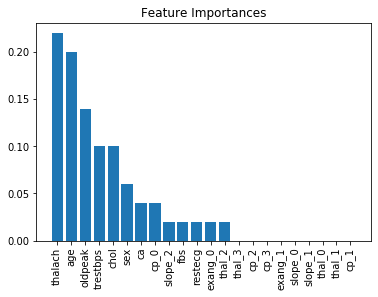

{'age': 0.2, 'sex': 0.06, 'trestbps': 0.1, 'chol': 0.1, 'fbs': 0.02, 'restecg': 0.02, 'thalach': 0.22, 'oldpeak': 0.14, 'ca': 0.04, 'cp_0': 0.04, 'cp_1': 0.0, 'cp_2': 0.0, 'cp_3': 0.0, 'exang_0': 0.02, 'exang_1': 0.0, 'slope_0': 0.0, 'slope_1': 0.0, 'slope_2': 0.02, 'thal_0': 0.0, 'thal_1': 0.0, 'thal_2': 0.02, 'thal_3': 0.0}


In [319]:
importances=adaboost_best.feature_importances_
indices = np.argsort(importances)[::-1]   #gives the index of highest importances in descending order

columns=num_columns + list(column_names)
names=[columns[i] for i in indices]

plt.title('Feature Importances')
plt.bar(range(X_train_encoded.shape[1]),importances[indices])
plt.xticks(range(X_train_encoded.shape[1]),names,rotation=90)
plt.show()

print(dict(zip(columns,importances)))